In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
from sklearn.preprocessing import StandardScaler

features = wine.data
target = wine.target

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
pcs = PCA()
pcs.fit(wine_df.dropna(axis=0))

pcsSummary_df = pd.DataFrame({
    'Standard Deviation' : np.sqrt(pcs.explained_variance_),
    'Proportion of Variance' : pcs.explained_variance_ratio_,
    'Cumulative proportions' : np.cumsum(pcs.explained_variance_ratio_)
})

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard Deviation,314.9635,13.1353,3.0873,2.2585,1.1339,0.9318,0.5357,0.3941,0.3372,0.2939,0.2149,0.1869,0.1441,0.09
Proportion of Variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
Cumulative proportions,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.00


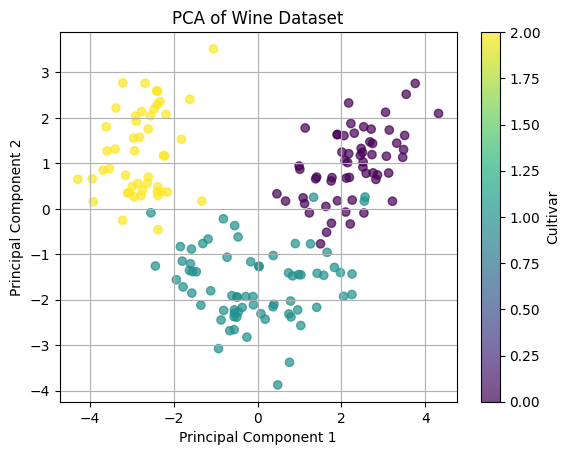

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap='viridis', alpha=0.7)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.colorbar(label='Cultivar')
plt.grid(True)
plt.show()

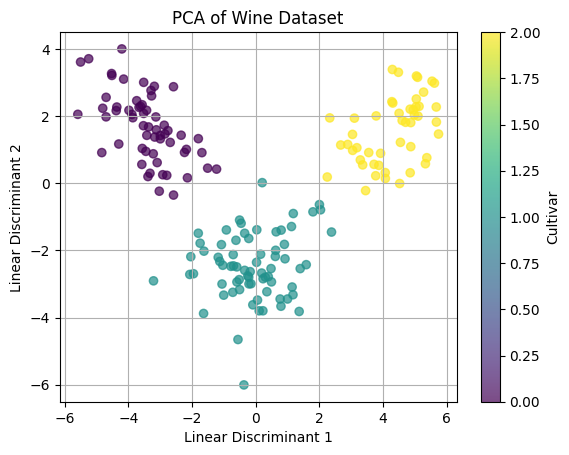

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
lda_result = lda.fit_transform(scaled_features, target)

plt.scatter(lda_result[:, 0], lda_result[:, 1], c=target, cmap='viridis', alpha=0.7)
plt.title('PCA of Wine Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')

plt.colorbar(label='Cultivar')
plt.grid(True)
plt.show()

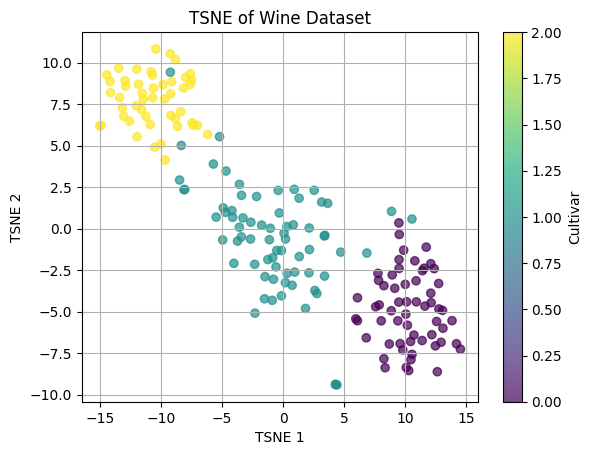

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(scaled_features)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=target, cmap='viridis', alpha=0.7)
plt.title('TSNE of Wine Dataset')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

plt.colorbar(label='Cultivar')
plt.grid(True)
plt.show()